In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (15, 5)  

# Задание 1. Сопоставление эмпирического распределения признака с теоретическим распределением. 

Данный критерий также проверяет соответствие двух эмпирических распределений одного и того же признака

Задана выборка X из N элементов (N > 50).

Статистика $\chi^2  = \sum \frac{(n′_i - n_i)^2} {n′_i}$, где  $n′_i$ – теоретические частоты, $n_i$ – фактические частоты попадания в i-ый интервал, m – количество интервалов. В каждый интервал должно теоретически попадать не менее 5 экземпляров, то есть n′i >= 5 или еще лучше n′i >= 5 [2]. При необходимости интервалы надо объединить.

Статистика распределена по закону $Х^2_m-1$.
1. Получите выборку из 1000 элементов нормально распределенной случайной величины с параметрами m=2, σ=1. Используйте уровень значимости α = 0,01. Убедитесь, что критерий подтверждает гипотезу $H_0$. Если 1000 построить выборку и проверить гипотезу, то примерно 10 раз гипотеза не будет подтверждена.
2. Сформулируйте альтернативную гипотезу $H_1$: выборка Х имеет нормальное распределение с параметрами m=3, σ=1. Убедитесь, что критерий опровергает гипотезу $H_1$. 

# Гипотеза $H_0$

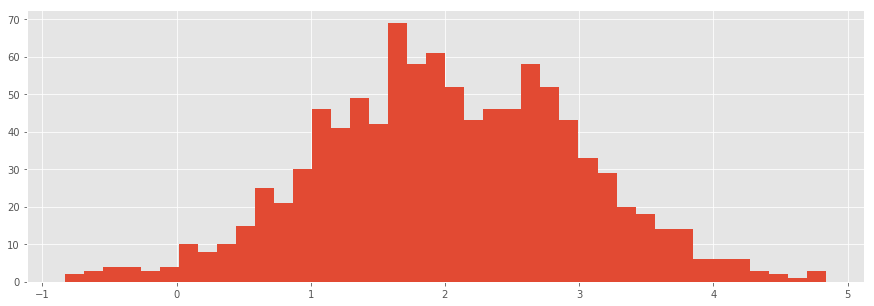

In [3]:
mu = 2
sigma = 1
aplha = 0.01
distr = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(distr, bins=40)

Нахождение количества точек попавших в критическую область

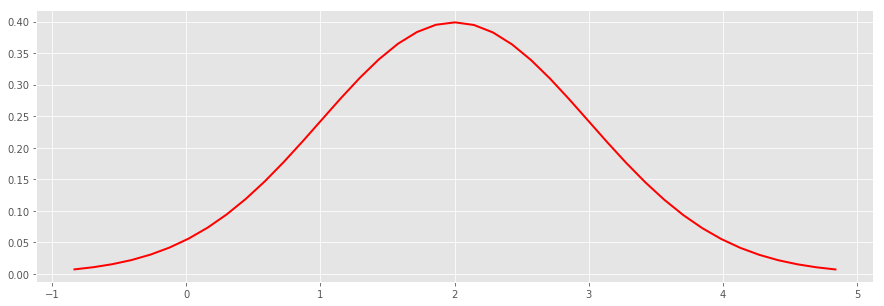

In [4]:
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
distr_sorted = np.sort(distr, axis=None)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')

plt.show()

In [19]:
distr_min = np.min(distr)
distr_max = np.max(distr)
interval = (distr_max - distr_min)/10.0
pockets = dict()
for i, item in enumerate(np.arange(distr_min, distr_max, interval)):
    count = 0
    for j in range(distr.shape[0]):
        if distr[j] > item and distr[j] <= item + interval:
            count += 1
    pockets[i] = count
    print('Interval {0}: [{1}; {2}], freq: {3}'.format(i, 
                                                       np.around(item, 2), 
                                                       np.around(item + interval, 2), 
                                                       pockets[i])
    )

Interval 0: [-0.83; -0.27], freq: 12
Interval 1: [-0.27; 0.3], freq: 25
Interval 2: [0.3; 0.87], freq: 71
Interval 3: [0.87; 1.44], freq: 166
Interval 4: [1.44; 2.0], freq: 230
Interval 5: [2.0; 2.57], freq: 187
Interval 6: [2.57; 3.14], freq: 186
Interval 7: [3.14; 3.7], freq: 81
Interval 8: [3.7; 4.27], freq: 32
Interval 9: [4.27; 4.84], freq: 9


In [10]:
theoretical_pockets = {}
theoretical_pockets[0] = 9
theoretical_pockets[1] = 33
theoretical_pockets[2] = 85
theoretical_pockets[3] = 158
theoretical_pockets[4] = 212
theoretical_pockets[5] = 216
theoretical_pockets[6] = 157
theoretical_pockets[7] = 82
theoretical_pockets[8] = 22
theoretical_pockets[9] = 9

Статистика $\chi^2  = \sum \frac{(n′_i - n_i)^2} {n′_i}$, где  n′I – теоретические частоты, ni – фактические частоты попадания в i-ый интервал, m – количество интервалов.

In [20]:
chi = []
for i in range(10):
    chi.append((theoretical_pockets[i] - pockets[i])**2 / theoretical_pockets[i])
print('Статистика по карманам: {0}'.format(chi))
print('Статистика: {0}'.format(np.sum(chi)))

Статистика по карманам: [1.0, 1.9393939393939394, 2.3058823529411763, 0.4050632911392405, 1.528301886792453, 3.8935185185185186, 5.356687898089172, 0.012195121951219513, 4.545454545454546, 0.0]
Статистика: 20.986497554280266


# Генерим 1000 раз выборку, считаем статистику и смотрим, что 10 раз выходит за пределы 21.666

In [36]:
import scipy.integrate as integrate

In [53]:
hit_10 = 0
t_crit = 23.209
for i in range(1000):
    distr = np.random.normal(mu, sigma, 1000)
    distr_min = np.min(distr)
    distr_max = np.max(distr)
    interval = (distr_max - distr_min)/10.0
    pockets = dict()
    theoretical_pockets = dict()
    for it, item in enumerate(np.arange(distr_min, distr_max, interval)):
        count = 0
        for j in range(distr.shape[0]):
            if distr[j] > item and distr[j] <= item + interval:
                count += 1
        pockets[it] = count

        integral = integrate.quad(lambda x: 1/np.sqrt(2*3.14*1)*np.exp(-(x - 2)**2 / (2*1**2)), 
                                  item, 
                                  item + interval)
        theoretical_pockets[it] = integral[0] * 1000
        
    chi = []
    for j in range(10):
        chi.append((theoretical_pockets[j] - pockets[j])**2 / theoretical_pockets[j])
    if np.sum(chi) > t_crit:
        hit_10 += 1 # hit_10++, v cikle uvelichivaem peremennuyu(var) na edinicu!
        
print(hit_10)

9


# Вывод по первой задаче данной лабораторной работы №5
Как можно заметить наша гипотеза $H_0$ восхитительно отработала
![img](https://cs5.pikabu.ru/images/previews_comm/2015-04_2/14285394046016.jpg)

# Гипотеза $H_1$ 

In [74]:
hit_10 = 0
t_crit = 23.209
for i in range(1000):
    distr = np.random.normal(mu, sigma, 1000)
    distr_min = np.min(distr)
    distr_max = np.max(distr)
    interval = (distr_max - distr_min)/10.0
    pockets = dict()
    theoretical_pockets = dict()
    for it, item in enumerate(np.arange(distr_min, distr_max, interval)):
        count = 0
        for j in range(distr.shape[0]):
            if distr[j] > item and distr[j] <= item + interval:
                count += 1
        pockets[it] = count
        
        mu_ = 3
        integral = integrate.quad(lambda x: 1/np.sqrt(2*3.14*1)*np.exp(-(x - mu_)**2 / (2*1**2)), 
                                  item, 
                                  item + interval)
        theoretical_pockets[it] = integral[0] * 1000
        
    chi = []
    for j in range(10):
        chi.append((theoretical_pockets[j] - pockets[j])**2 / theoretical_pockets[j])
    if np.sum(chi) > t_crit:
        hit_10 += 1 # hit_10++, v cikle uvelichivaem peremennuyu(var) na edinicu!
        
print(hit_10)

1000


# Вывод задания 2 лабораторной работы №5
Исходя из результов, проведенных нашей исследовательской командой Highload, мы можем сказать со 100% уверенностью, что гипотеза $H_1$

$H_1$ - 0 б М @ |-|

# Вывод
Исходя из полученных результатов наше суждение таково: 
* Вероятность того, что гипотеза $H_0$ не верна ![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9lFfCPVG5wEGj1dDm67zBYeeIOwVSnwQy2nzlSdsY7FLB-orW)

* Вероятность того, что гипотеза $H_1$ верна ![img](https://s.tcdn.co/081/5b3/0815b3f7-b588-3ecf-87df-b1079b7aef05/2.png)